# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [44]:
# Import your libraries
import pandas as pd
import requests
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 8 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

# What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

## Dataset

In [5]:
monjes = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [6]:
monjes.head(20)

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus
5,-0.412837,-0.346197,0.601936,2.211191,0.440474,0.356414,-1.138838,1.623671,2.371513,1.346221,Mongucus
6,0.056229,0.187683,-0.031104,-0.958476,0.261718,-0.598658,0.861934,-0.885246,-0.528364,-0.848946,Clarius
7,-0.128929,-0.032150,0.068476,-0.151655,-0.989576,-0.806282,0.295677,0.259758,0.251173,-0.767984,Clarius
8,0.130292,-0.275537,0.274747,-0.574878,0.261718,2.889429,0.635431,-1.180749,-0.840179,2.303929,Marcus
9,0.080916,0.438921,0.143160,-0.523288,0.261718,-0.598658,0.106925,-0.641641,0.188810,-0.491704,Ubuntius


`Keep calm and code on!`

## Explore Data

In [8]:
monjes.shape

(12017, 11)

# Challenge - train your models, make the best prediction

### Label encoder 
Encode target labels with value between 0 and n_classes-1.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
monjes["numeric"] = le.fit_transform(data["10"])

In [14]:
monjes.head()

,0,1,2,3,4,5,6,7,8,9,10,numeric
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus,3
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius,0
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus,6
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus,6
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus,6


In [16]:
columnas = [a for a in data.columns if a not in ["10","numeric"]]
X = monjes[columnas]  
y = monjes["numeric"]

### Train_Test Split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
monjes.numeric.sample(10)

9920     0
8526     6
7484     7
10553    3
6904     7
4442     7
7925     4
11485    3
2097     6
8076     2
Name: numeric, dtype: int32

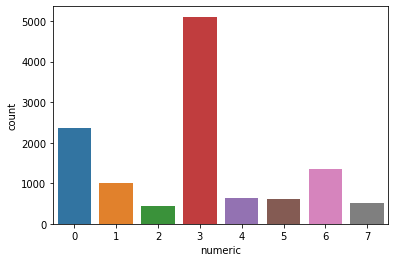

In [18]:
sns.countplot(x=monjes.numeric);

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (9613, 10)
X_test: (2404, 10)
y_train: (9613,)
y_test: (2404,)


### Train One Model

Classifier implementing the k-nearest neighbors vote. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [30]:
log = LogisticRegression(max_iter=10000) 

**Entreno mi modelo - TRAIN**

In [32]:
log.fit(X_train, y_train)   

LogisticRegression(max_iter=10000)

In [33]:
log.score(X_train, y_train)  #56% Accuracy mejor 

0.5697492978258608

**Entreno mi modelo - TEST**

In [34]:
log.fit(X_test, y_test)

LogisticRegression(max_iter=10000)

In [35]:
log.score(X_test, y_test)  #58% Accuracy mejor

0.586522462562396

**Predicción - TEST**

In [87]:
y_pred_test = log.predict(X_test)
y_pred_test[:25]  #es la predicción que hacemos de TEST

array([3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 4, 1, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3,
       3, 0, 6])

In [42]:
list(y_test[:25]) #compruebo sobre el y_test que tan bien ha predecido mi modelo

[3, 3, 7, 3, 3, 1, 3, 0, 5, 0, 4, 1, 7, 6, 3, 3, 0, 3, 4, 1, 2, 3, 3, 5, 6]

### Exploring metrics for multi-class classification algorithms
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

- Accuracy
- Precission
- Recall
- F1_score

**Entrenamos todo nuestro dataframe**

ya tenemos `X` e `y` definidas 

In [45]:
log.fit(X, y)

LogisticRegression(max_iter=10000)

In [47]:
monjes['prediction_monjes'] = log.predict(X)
monjes.head(10)

,0,1,2,3,4,5,6,7,8,9,10,numeric,prediction_monjes
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus,3,3
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius,0,3
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus,6,6
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus,6,0
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus,6,3
5,-0.412837,-0.346197,0.601936,2.211191,0.440474,0.356414,-1.138838,1.623671,2.371513,1.346221,Mongucus,4,4
6,0.056229,0.187683,-0.031104,-0.958476,0.261718,-0.598658,0.861934,-0.885246,-0.528364,-0.848946,Clarius,0,3
7,-0.128929,-0.032150,0.068476,-0.151655,-0.989576,-0.806282,0.295677,0.259758,0.251173,-0.767984,Clarius,0,3
8,0.130292,-0.275537,0.274747,-0.574878,0.261718,2.889429,0.635431,-1.180749,-0.840179,2.303929,Marcus,3,3
9,0.080916,0.438921,0.143160,-0.523288,0.261718,-0.598658,0.106925,-0.641641,0.188810,-0.491704,Ubuntius,7,3


In [48]:
monjes['correct_pred'] = (monjes.numeric == monjes.prediction_monjes)
monjes.head(10)

,0,1,2,3,4,5,6,7,8,9,10,numeric,prediction_monjes,correct_pred
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus,3,3,True
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius,0,3,False
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus,6,6,True
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus,6,0,False
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus,6,3,False
5,-0.412837,-0.346197,0.601936,2.211191,0.440474,0.356414,-1.138838,1.623671,2.371513,1.346221,Mongucus,4,4,True
6,0.056229,0.187683,-0.031104,-0.958476,0.261718,-0.598658,0.861934,-0.885246,-0.528364,-0.848946,Clarius,0,3,False
7,-0.128929,-0.032150,0.068476,-0.151655,-0.989576,-0.806282,0.295677,0.259758,0.251173,-0.767984,Clarius,0,3,False
8,0.130292,-0.275537,0.274747,-0.574878,0.261718,2.889429,0.635431,-1.180749,-0.840179,2.303929,Marcus,3,3,True
9,0.080916,0.438921,0.143160,-0.523288,0.261718,-0.598658,0.106925,-0.641641,0.188810,-0.491704,Ubuntius,7,3,False


In [49]:
pd.crosstab(monjes.numeric, monjes.prediction_monjes)

prediction_monjes,0,1,2,3,4,5,6,7
numeric,,,,,,,,
0,229,19,0,2069,2,11,32,0
1,17,885,1,44,31,20,11,0
2,16,2,0,343,2,13,51,0
3,166,26,2,4787,14,20,91,1
4,5,45,0,61,484,4,41,0
5,61,8,0,339,1,94,97,0
6,64,23,0,781,82,25,385,0
7,20,0,0,457,4,17,14,0


In [51]:
accuracy_monjes = monjes.correct_pred.sum()/monjes.shape[0]
accuracy_monjes  #57% de las veces hago una buena predicción 

0.5711908130148956

In [52]:
accuracy_score(monjes.numeric, monjes.prediction_monjes)

0.5711908130148956

**Métricas TEST**

In [89]:
print( f'Accuracy: {round(accuracy_score(y_test, y_pred_test), 3)} %')
print( f'Recall: {round(recall_score(y_test, y_pred_test, average="macro"), 3)} %')
print( f'F1: {round(f1_score(y_test, y_pred_test, average="macro"), 3)} %')
print( f'Precision: {round(precision_score(y_test, y_pred_test, average="macro"), 3)} %')

Accuracy: 0.565 %
Recall: 0.387 %
F1: 0.381 %
Precision: 0.44 %


### Training several models and explores the metrics for each of them

- DecisionTreeClassifier
- SVC
- RandomForestClassifier
- AdaBoostClassifier
- DecisionTreeClassifier

In [10]:
# Your Code